In [34]:
import pandas as pd
from datetime import timedelta
import numpy as np
%pylab inline

df_goog = pd.read_csv('../assets/datasets/goog.csv')

Populating the interactive namespace from numpy and matplotlib


Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

In [3]:
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995
1,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976
2,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998
3,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983
4,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000


In [6]:
df_goog.describe()

,Open,High,Low,Close,Volume,Adj Close
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,575.890686,609.268155,552.366753,584.801935,2.019245e+06,584.801935
std,56.597440,71.429837,64.162213,69.206444,6.682940e+05,69.206444
min,524.729980,541.412415,487.562195,520.510010,2.530000e+04,520.510010
25%,538.548111,565.495086,516.023072,538.463135,1.685675e+06,538.463135
50%,560.617554,581.727631,534.417419,559.487549,1.856900e+06,559.487549
75%,577.745132,639.383209,565.040634,600.655640,2.387900e+06,600.655640
max,747.109985,775.955017,745.630005,762.369995,3.290800e+06,762.369995


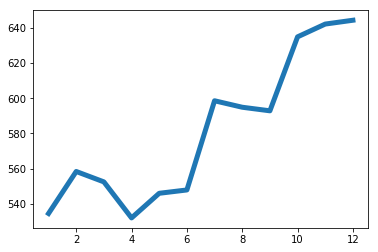

In [15]:
# plot(df_goog[df_goog.columns.drop('Date')])

from matplotlib import pyplot as plt
df_goog['Date'] = pd.to_datetime(df_goog.Date)
df_goog['month'] = df_goog.Date.dt.month
df_goog['day'] = df_goog.Date.dt.day
df_goog['year'] = df_goog.Date.dt.year

df_goog_ts = df_goog.groupby('month').aggregate(mean)['Close']
plt.plot(df_goog_ts.index, df_goog_ts.values, lw=5)

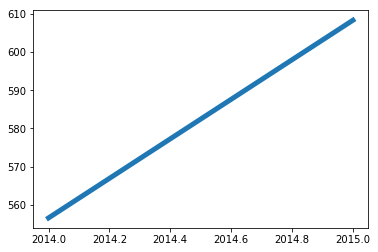

In [16]:
df_goog_ts = df_goog.groupby('year').aggregate(mean)['Close']
plt.plot(df_goog_ts.index, df_goog_ts.values, lw=5)

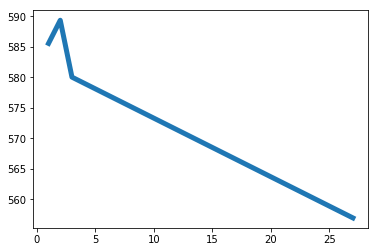

In [18]:
df_goog_ts = df_goog.groupby('day').aggregate(mean)['Close']
plt.plot(df_goog_ts.index, df_goog_ts.values, lw=5)


We are looking at the google stock price data. It's at it's highest at the beginning of the month and then drops, but overall, is steadily increasing.

Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

In [21]:
df_goog.Date.unique()

array(['2015-12-01T00:00:00.000000000', '2015-11-02T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2015-08-03T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', '2015-05-01T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2015-03-02T00:00:00.000000000',
       '2015-02-02T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2014-11-03T00:00:00.000000000',
       '2014-10-01T00:00:00.000000000', '2014-09-02T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-06-02T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2014-04-01T00:00:00.000000000', '2014-03-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [61]:
from __future__ import division
def eda(dataframe):
    from IPython.core import display as ICD
    
    print "dataframe shape: ",dataframe.shape      ## rows by columns
    print ''
    print 'num duplicates:', dataframe.duplicated().sum() ## df.drop_duplicates() to remove dupes
    print ''
    print "pct missing values \n"
    missing = pd.DataFrame(df_goog.isnull().sum()/len(df_goog)*100,columns=['Pct Missing'])
    missing['Num Missing'] = df_goog.isnull().sum()
    ICD.display(missing), ## count number of null values per column

    print ''
    print "dataframe types \n"
    ICD.display(pd.DataFrame(dataframe.dtypes,columns=['Dtype']))       ## list data type of each column
    print ''
    print "dataframe describe \n"
    ICD.display(pd.DataFrame(dataframe.describe()))## stats -- mean, min, max, etc.. 
    print ''
    print 'unique values in series:\n'
    u_list = []
    for item in dataframe:                             ## count number of unique values per column
        u_list.append([item, dataframe[item].nunique()])
    unique_vals = pd.DataFrame(u_list,columns=['Column','Num_unique'])
    ICD.display(unique_vals)

In [62]:
from __future__ import division
eda(df_goog)

dataframe shape:  (22, 7)

num duplicates: 0

pct missing values 



,Pct Missing,Num Missing
Date,0.0,0
Open,0.0,0
High,0.0,0
Low,0.0,0
Close,0.0,0
Volume,0.0,0
Adj Close,0.0,0



dataframe types 



,Dtype
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64



dataframe describe 



,Open,High,Low,Close,Volume,Adj Close
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,575.890686,609.268155,552.366753,584.801935,2.019245e+06,584.801935
std,56.597440,71.429837,64.162213,69.206444,6.682940e+05,69.206444
min,524.729980,541.412415,487.562195,520.510010,2.530000e+04,520.510010
25%,538.548111,565.495086,516.023072,538.463135,1.685675e+06,538.463135
50%,560.617554,581.727631,534.417419,559.487549,1.856900e+06,559.487549
75%,577.745132,639.383209,565.040634,600.655640,2.387900e+06,600.655640
max,747.109985,775.955017,745.630005,762.369995,3.290800e+06,762.369995



unique values in series:



,Column,Num_unique
0,Date,22
1,Open,22
2,High,22
3,Low,22
4,Close,21
5,Volume,22
6,Adj Close,21


Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [35]:
df_goog.set_index('Date',inplace=True)

We now need to convert the string to a DateTime object. 

In [36]:
df_goog.index = pd.to_datetime(df_goog.index)

Let's add some more columns with useful data extracted from the DateTime index.

In [37]:
df_goog['Month'] = df_goog.index.month
df_goog['Year'] = df_goog.index.year
df_goog['Day'] = df_goog.index.day
df_goog['Hour'] = df_goog.index.hour
df_goog['Minute'] = df_goog.index.minute
df_goog['Seconds'] = df_goog.index.second

Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [38]:
df_goog['Increased'] = np.NaN
df_goog['Increased'][df_goog.Open<df_goog.Close] = 1
df_goog['Increased'][df_goog.Open>df_goog.Close] = 0

df_goog[['Open','Close','Increased']]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Open,Close,Increased
Date,,,
2015-12-01,747.109985,762.369995,1.0
2015-11-02,711.059998,742.599976,1.0
2015-10-01,608.369995,710.809998,1.0
2015-09-01,602.359985,608.419983,1.0
2015-08-03,625.340027,618.250000,0.0
2015-07-01,524.729980,625.609985,1.0
2015-06-01,536.789978,520.510010,0.0
2015-05-01,538.429993,532.109985,0.0
2015-04-01,548.602417,537.340027,0.0


We can use the DateTime object to access various different cuts of data using date attributes. Filter the dataframe so you're only looking at information from 2015

In [39]:
df_goog[df_goog.index.year==2015]

,Open,High,Low,Close,Volume,Adj Close,Month,Year,Day,Hour,Minute,Seconds,Increased
Date,,,,,,,,,,,,,
2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,12,2015,1,0,0,0,1.0
2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,11,2015,2,0,0,0,1.0
2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,10,2015,1,0,0,0,1.0
2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,9,2015,1,0,0,0,1.0
2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,8,2015,3,0,0,0,0.0
2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,7,2015,1,0,0,0,1.0
2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,6,2015,1,0,0,0,0.0
2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,5,2015,1,0,0,0,0.0
2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,4,2015,1,0,0,0,0.0


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

Shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

In [68]:
from datetime import timedelta


df_goog.index = df_goog.index - timedelta(hours=1)
df_goog

,Open,High,Low,Close,Volume,Adj Close,Month,Year,Day,Hour,Minute,Seconds,Increased
Date,,,,,,,,,,,,,
2015-11-28 23:00:00,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,12,2015,1,0,0,0,1.0
2015-10-30 23:00:00,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,11,2015,2,0,0,0,1.0
2015-09-28 23:00:00,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,10,2015,1,0,0,0,1.0
2015-08-29 23:00:00,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,9,2015,1,0,0,0,1.0
2015-07-31 23:00:00,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,8,2015,3,0,0,0,0.0
2015-06-28 23:00:00,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,7,2015,1,0,0,0,1.0
2015-05-29 23:00:00,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,6,2015,1,0,0,0,0.0
2015-04-28 23:00:00,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,5,2015,1,0,0,0,0.0
2015-03-29 23:00:00,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,4,2015,1,0,0,0,0.0


In [69]:
df_goog.index = df_goog.index + timedelta(hours=1)
df_goog

,Open,High,Low,Close,Volume,Adj Close,Month,Year,Day,Hour,Minute,Seconds,Increased
Date,,,,,,,,,,,,,
2015-11-29,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,12,2015,1,0,0,0,1.0
2015-10-31,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,11,2015,2,0,0,0,1.0
2015-09-29,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,10,2015,1,0,0,0,1.0
2015-08-30,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,9,2015,1,0,0,0,1.0
2015-08-01,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,8,2015,3,0,0,0,0.0
2015-06-29,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,7,2015,1,0,0,0,1.0
2015-05-30,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,6,2015,1,0,0,0,0.0
2015-04-29,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,5,2015,1,0,0,0,0.0
2015-03-30,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,4,2015,1,0,0,0,0.0


In [70]:
df_goog.index = df_goog.index + timedelta(days=3)
df_goog

,Open,High,Low,Close,Volume,Adj Close,Month,Year,Day,Hour,Minute,Seconds,Increased
Date,,,,,,,,,,,,,
2015-12-02,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,12,2015,1,0,0,0,1.0
2015-11-03,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,11,2015,2,0,0,0,1.0
2015-10-02,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,10,2015,1,0,0,0,1.0
2015-09-02,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,9,2015,1,0,0,0,1.0
2015-08-04,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,8,2015,3,0,0,0,0.0
2015-07-02,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,7,2015,1,0,0,0,1.0
2015-06-02,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,6,2015,1,0,0,0,0.0
2015-05-02,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,5,2015,1,0,0,0,0.0
2015-04-02,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,4,2015,1,0,0,0,0.0


In [71]:
df_goog.index = df_goog.index - timedelta(days=3)
df_goog

,Open,High,Low,Close,Volume,Adj Close,Month,Year,Day,Hour,Minute,Seconds,Increased
Date,,,,,,,,,,,,,
2015-11-29,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,12,2015,1,0,0,0,1.0
2015-10-31,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,11,2015,2,0,0,0,1.0
2015-09-29,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,10,2015,1,0,0,0,1.0
2015-08-30,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,9,2015,1,0,0,0,1.0
2015-08-01,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,8,2015,3,0,0,0,0.0
2015-06-29,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,7,2015,1,0,0,0,1.0
2015-05-30,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,6,2015,1,0,0,0,0.0
2015-04-29,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,5,2015,1,0,0,0,0.0
2015-03-30,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,4,2015,1,0,0,0,0.0


In [72]:
df_goog.index = df_goog.index + timedelta(days=365*12, hours=1, seconds=43)
df_goog

,Open,High,Low,Close,Volume,Adj Close,Month,Year,Day,Hour,Minute,Seconds,Increased
Date,,,,,,,,,,,,,
2027-11-26 01:00:43,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,12,2015,1,0,0,0,1.0
2027-10-28 01:00:43,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,11,2015,2,0,0,0,1.0
2027-09-26 01:00:43,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,10,2015,1,0,0,0,1.0
2027-08-27 01:00:43,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,9,2015,1,0,0,0,1.0
2027-07-29 01:00:43,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,8,2015,3,0,0,0,0.0
2027-06-26 01:00:43,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,7,2015,1,0,0,0,1.0
2027-05-27 01:00:43,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,6,2015,1,0,0,0,0.0
2027-04-26 01:00:43,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,5,2015,1,0,0,0,0.0
2027-03-27 01:00:43,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,4,2015,1,0,0,0,0.0


In [73]:
df_goog.index = df_goog.index - timedelta(days=365*12, hours=1, seconds=43)
df_goog

,Open,High,Low,Close,Volume,Adj Close,Month,Year,Day,Hour,Minute,Seconds,Increased
Date,,,,,,,,,,,,,
2015-11-29,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,12,2015,1,0,0,0,1.0
2015-10-31,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,11,2015,2,0,0,0,1.0
2015-09-29,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,10,2015,1,0,0,0,1.0
2015-08-30,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,9,2015,1,0,0,0,1.0
2015-08-01,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,8,2015,3,0,0,0,0.0
2015-06-29,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,7,2015,1,0,0,0,1.0
2015-05-30,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,6,2015,1,0,0,0,0.0
2015-04-29,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,5,2015,1,0,0,0,0.0
2015-03-30,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,4,2015,1,0,0,0,0.0


Calculate the autocorrelation at a 1 day, 10 day, and 30 day lag. Plot these. What can you infer from this?

-0.0161140813473
-0.0785388547847
-0.565443380196


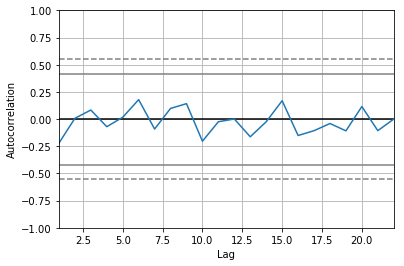

In [83]:
print df_goog['Volume'].resample('M').mean().autocorr(lag=1)
print df_goog['Volume'].resample('M').mean().autocorr(lag=10)
print df_goog['Volume'].resample('D').mean().autocorr(lag=30)

from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df_goog['Volume'])
pyplot.show()

Calculate the 3-day, 5-day, and 7-day moving average. 

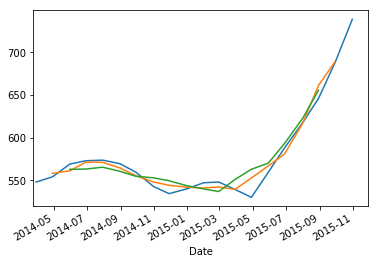

In [79]:
# 3-day rolling mean of daily store sales
df_goog['Close'].rolling(window=3, center=True).mean().plot()
df_goog['Close'].rolling(window=5, center=True).mean().plot()
df_goog['Close'].rolling(window=7, center=True).mean().plot()